In [1]:
# Load libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

2023-03-08 09:03:07.868678: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
df = pd.read_csv('/Users/rumsoar/Downloads/data.csv')
df.head(5)

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# Encode target variable (M = malignant, B = benign)
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

In [4]:
# Check for missing values
print(df.isna().sum())

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [5]:
df.describe()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [38]:
# Print the shape of the dataset
print(df.shape)

(569, 33)


In [37]:
# Print the data types of the columns
print(df.dtypes)

id                           int64
diagnosis                    int64
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [7]:
# Print the number of unique values in each column
print(df.nunique())


id                         569
diagnosis                    2
radius_mean                456
texture_mean               479
perimeter_mean             522
area_mean                  539
smoothness_mean            474
compactness_mean           537
concavity_mean             537
concave points_mean        542
symmetry_mean              432
fractal_dimension_mean     499
radius_se                  540
texture_se                 519
perimeter_se               533
area_se                    528
smoothness_se              547
compactness_se             541
concavity_se               533
concave points_se          507
symmetry_se                498
fractal_dimension_se       545
radius_worst               457
texture_worst              511
perimeter_worst            514
area_worst                 544
smoothness_worst           411
compactness_worst          529
concavity_worst            539
concave points_worst       492
symmetry_worst             500
fractal_dimension_worst    535
Unnamed:

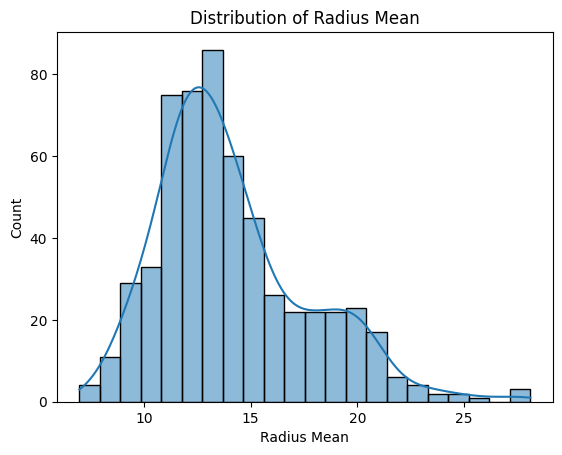

In [20]:
# Create a histogram of the radius_mean feature
sns.histplot(df['radius_mean'], kde=True)
plt.title('Distribution of Radius Mean')
plt.xlabel('Radius Mean')
plt.show()


/var/folders/xm/f7f1b0nx05nfnf5dvljwlqy80000gn/T/ipykernel_12182/1835276625.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['texture_mean'], shade=True)


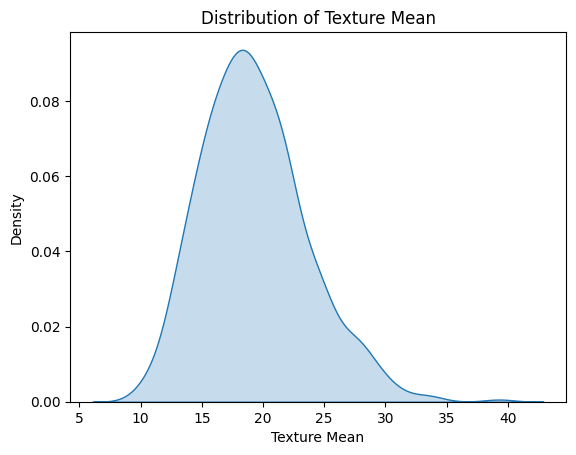

In [21]:

# Create a density plot of the texture_mean feature
sns.kdeplot(df['texture_mean'], shade=True)
plt.title('Distribution of Texture Mean')
plt.xlabel('Texture Mean')
plt.show()


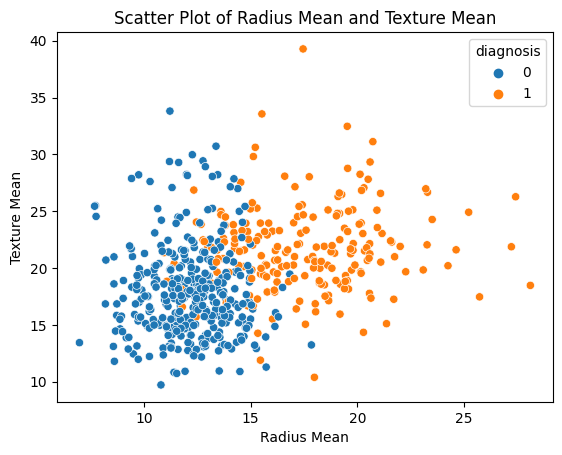

In [24]:
# Create a scatter plot of the radius_mean and texture_mean features
sns.scatterplot(data=df, x='radius_mean', y='texture_mean', hue='diagnosis')
plt.title('Scatter Plot of Radius Mean and Texture Mean')
plt.xlabel('Radius Mean')
plt.ylabel('Texture Mean')
plt.show()



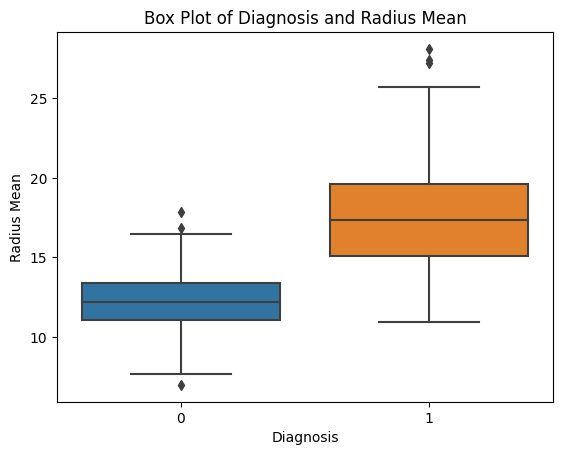

In [26]:

# Create a box plot of the radius_mean and diagnosis features
sns.boxplot(data=df, x='diagnosis', y='radius_mean')
plt.title('Box Plot of Diagnosis and Radius Mean')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.show()


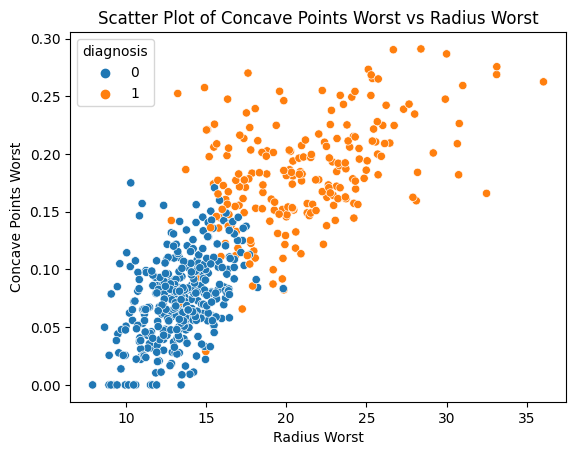

In [29]:
# Create a scatter plot of concave points_worst vs radius_worst colored by diagnosis
sns.scatterplot(x='radius_worst', y='concave points_worst', hue='diagnosis', data=df)
plt.xlabel('Radius Worst')
plt.ylabel('Concave Points Worst')
plt.title('Scatter Plot of Concave Points Worst vs Radius Worst')
plt.show()




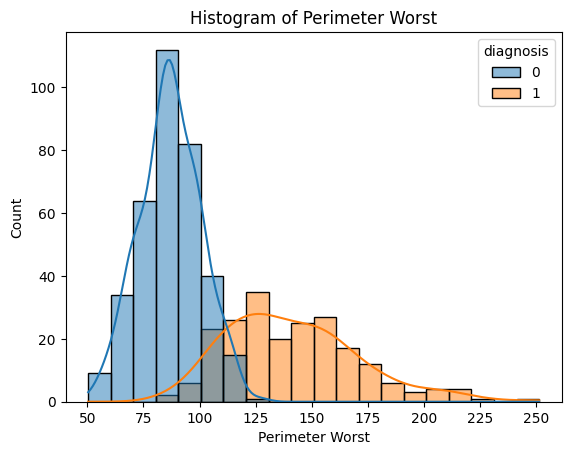

In [31]:
# Create a histogram of perimeter_worst by diagnosis
sns.histplot(x='perimeter_worst', hue='diagnosis', data=df, kde=True, bins=20)
plt.xlabel('Perimeter Worst')
plt.ylabel('Count')
plt.title('Histogram of Perimeter Worst')
plt.show()


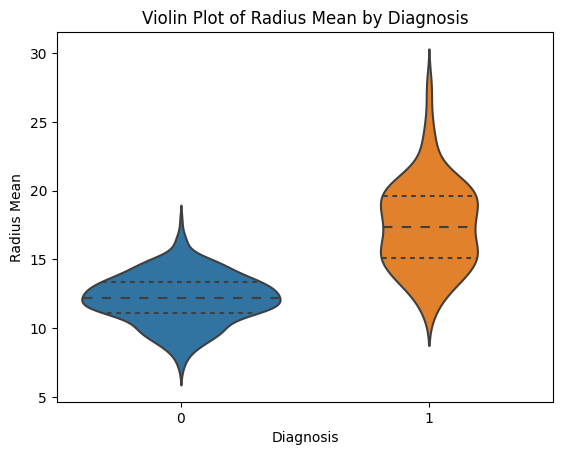

In [32]:

# Create a violin plot of radius_mean by diagnosis
sns.violinplot(x='diagnosis', y='radius_mean', data=df, inner='quartile')
plt.xlabel('Diagnosis')
plt.ylabel('Radius Mean')
plt.title('Violin Plot of Radius Mean by Diagnosis')
plt.show()


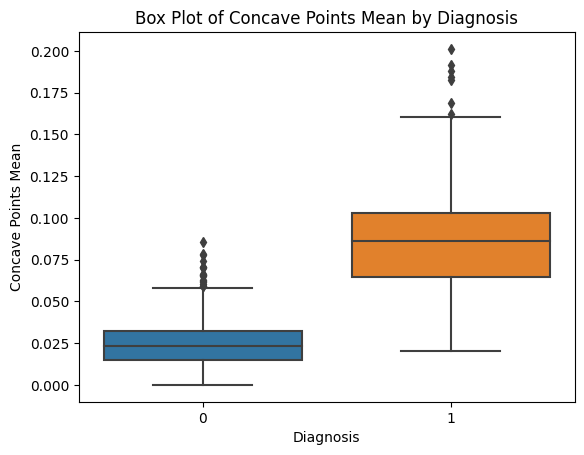

In [33]:

# Create a box plot of concave points_mean by diagnosis
sns.boxplot(x='diagnosis', y='concave points_mean', data=df)
plt.xlabel('Diagnosis')
plt.ylabel('Concave Points Mean')
plt.title('Box Plot of Concave Points Mean by Diagnosis')
plt.show()



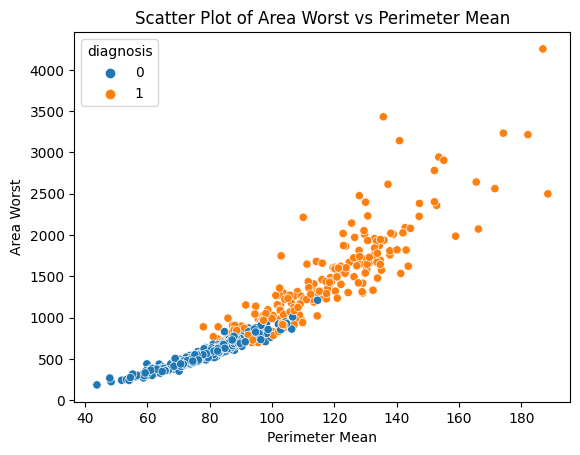

In [34]:
# Create a scatter plot of area_worst vs perimeter_mean colored by diagnosis
sns.scatterplot(x='perimeter_mean', y='area_worst', hue='diagnosis', data=df)
plt.xlabel('Perimeter Mean')
plt.ylabel('Area Worst')
plt.title('Scatter Plot of Area Worst vs Perimeter Mean')
plt.show()

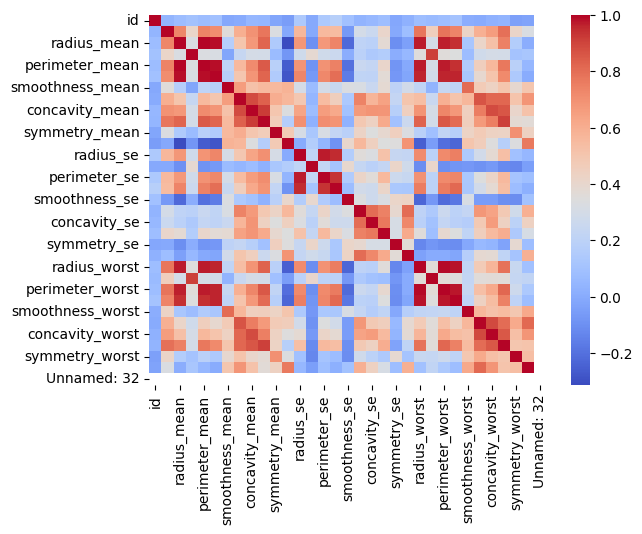

In [22]:
# Print a heatmap of the correlation matrix
sns.heatmap(df.corr(), cmap='coolwarm')
plt.show()

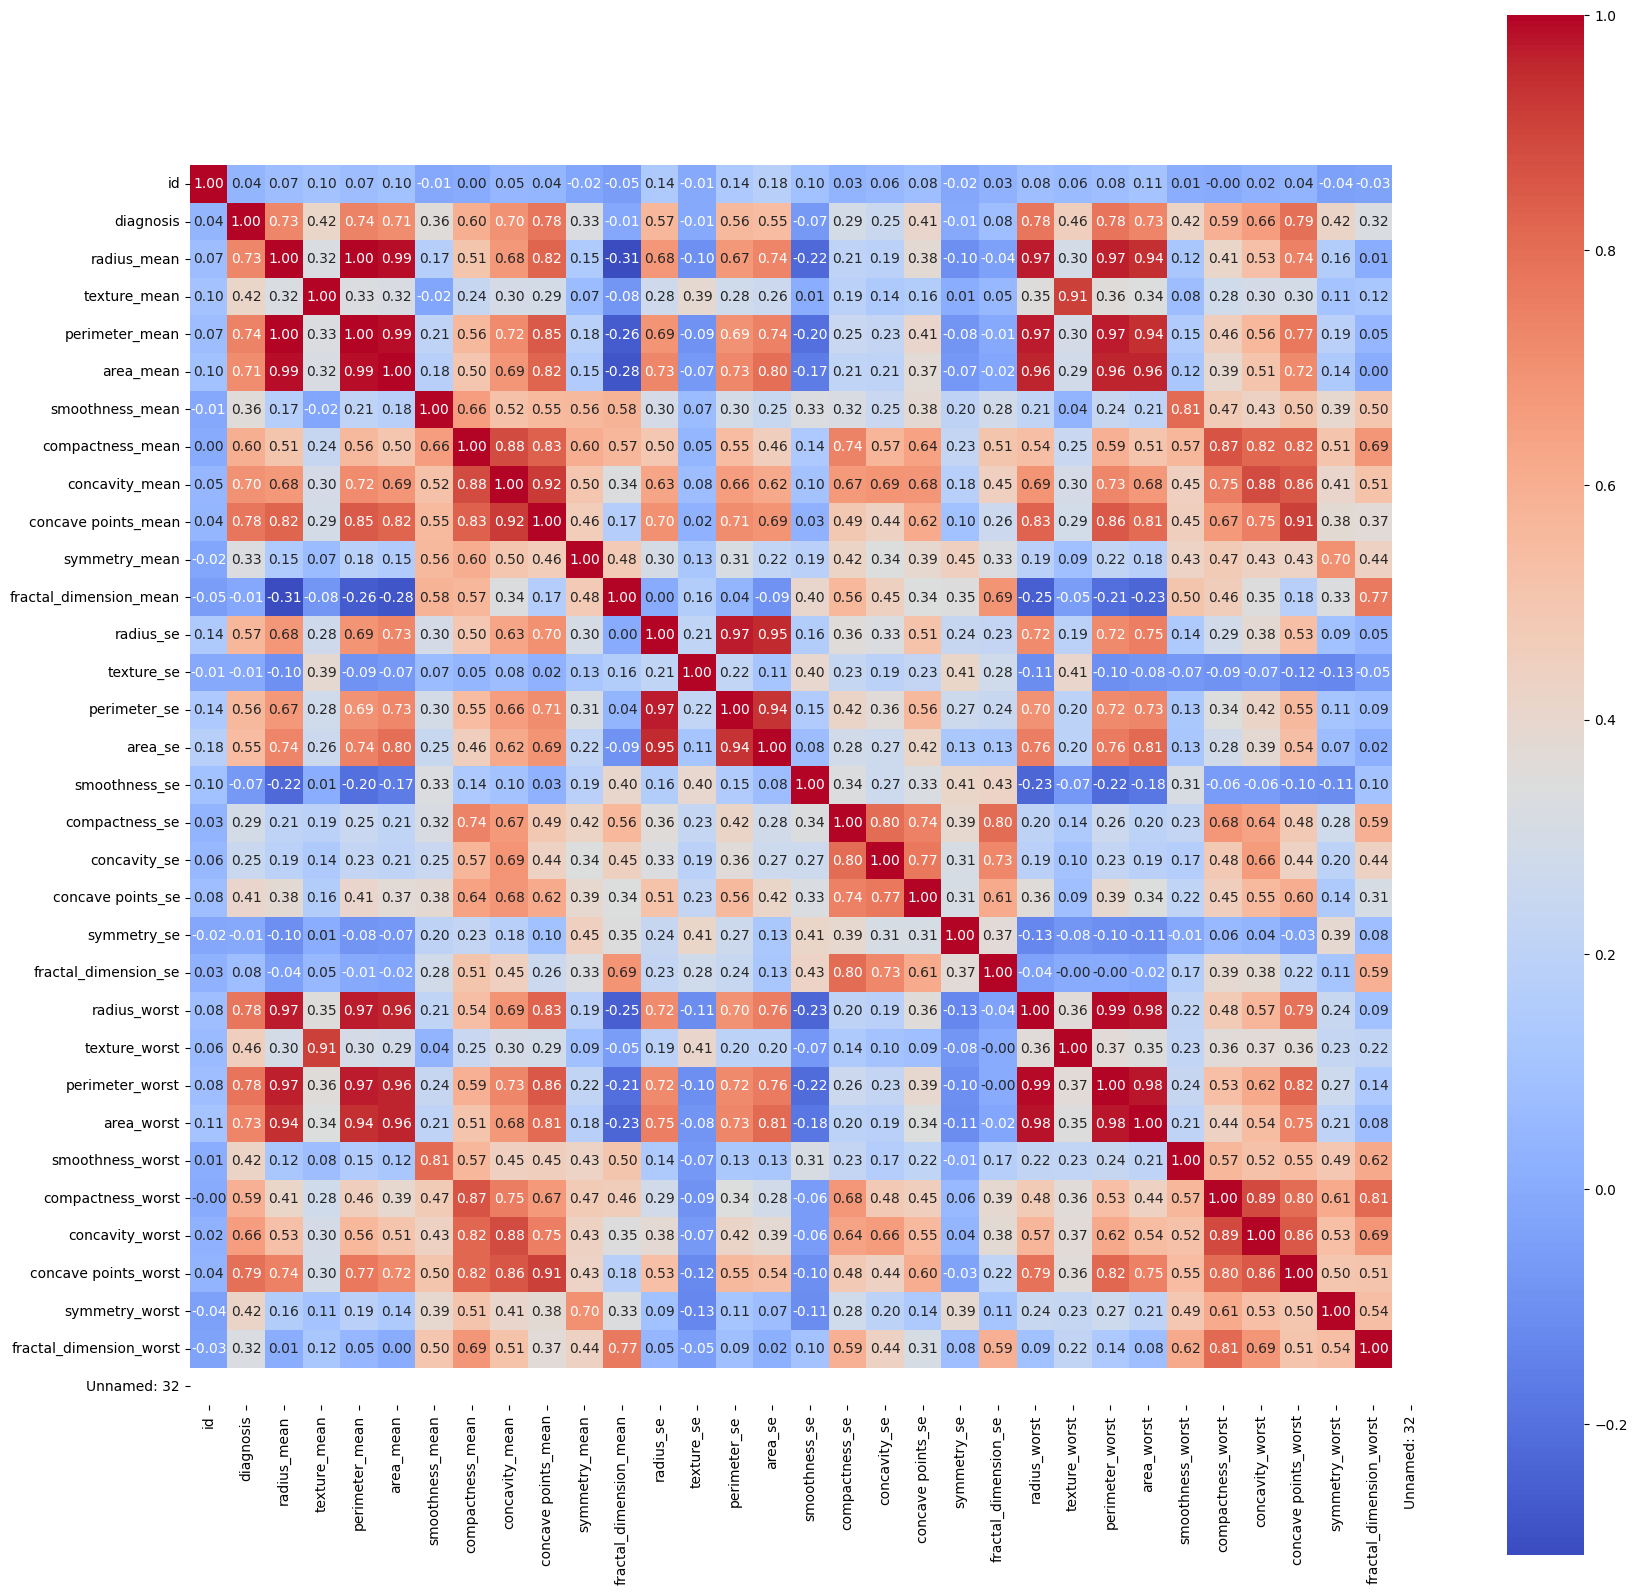

In [43]:

# Visualize correlation between variables
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', square=True)

# Save the figure
plt.savefig('correlation_heatmap.png')
plt.show()

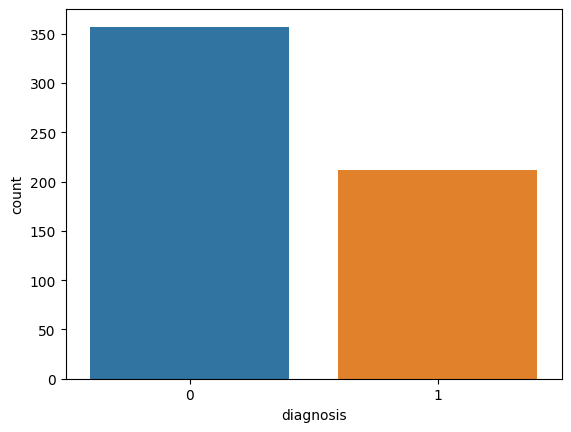

In [5]:
# Print a count plot of the diagnosis column
sns.countplot(x='diagnosis', data=df)
plt.show()



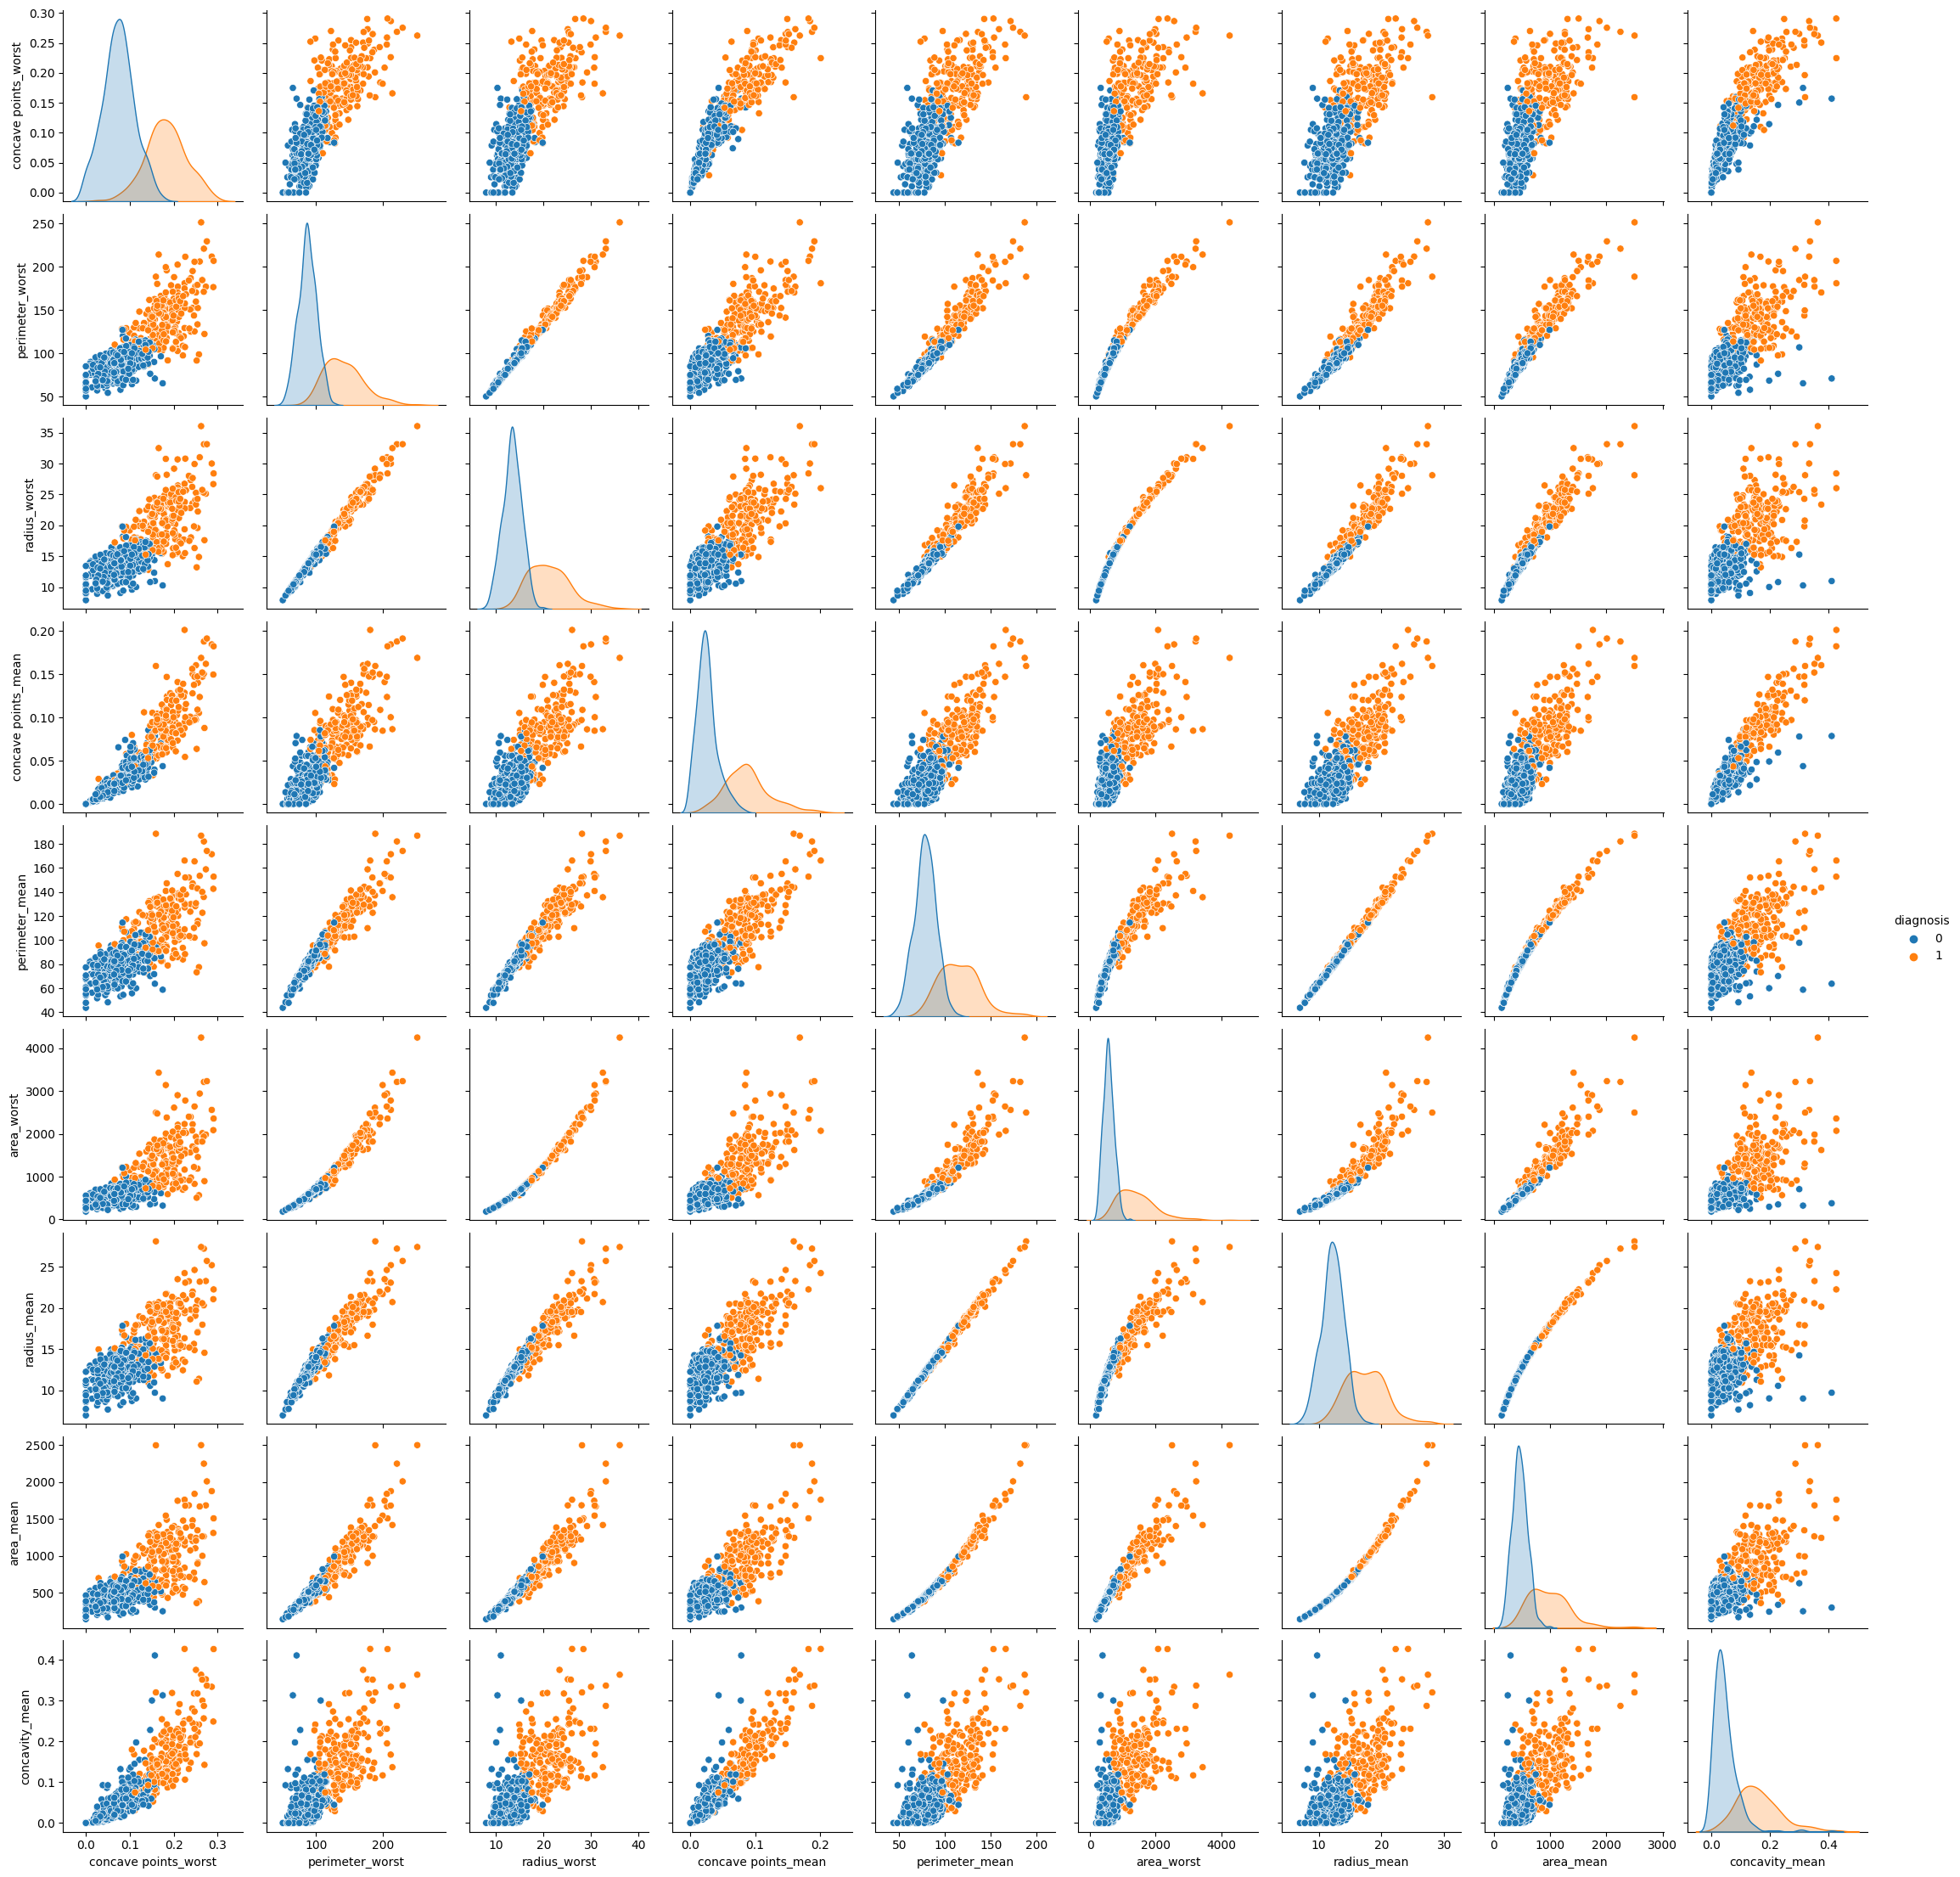

In [41]:
selected_features = ['concave points_worst', 'perimeter_worst', 'radius_worst', 'concave points_mean', 
                     'perimeter_mean', 'area_worst', 'radius_mean', 'area_mean', 'concavity_mean', 'diagnosis']

sns.pairplot(df[selected_features], hue='diagnosis')
# Save the figure
plt.savefig('pairplot.png')

In [35]:
# Select the features
selected_features = ['texture_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 
                     'concave points_mean', 'fractal_dimension_mean', 'radius_se', 'texture_se', 
                     'smoothness_se', 'compactness_se', 'concavity_se', 'concave points_se', 
                     'symmetry_se', 'radius_worst', 'texture_worst', 'area_worst', 'smoothness_worst', 
                     'concavity_worst', 'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df[selected_features], 
                                                    df['diagnosis'], 
                                                    test_size=0.2, 
                                                    random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the neural network model
model = Sequential()
model.add(Dense(16, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=2)

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')


Epoch 1/50
15/15 - 1s - loss: 0.6963 - accuracy: 0.5692 - 544ms/epoch - 36ms/step
Epoch 2/50
15/15 - 0s - loss: 0.5231 - accuracy: 0.7451 - 13ms/epoch - 873us/step
Epoch 3/50
15/15 - 0s - loss: 0.4197 - accuracy: 0.8505 - 13ms/epoch - 899us/step
Epoch 4/50
15/15 - 0s - loss: 0.3497 - accuracy: 0.9011 - 15ms/epoch - 976us/step
Epoch 5/50
15/15 - 0s - loss: 0.3026 - accuracy: 0.9143 - 14ms/epoch - 937us/step
Epoch 6/50
15/15 - 0s - loss: 0.2675 - accuracy: 0.9209 - 14ms/epoch - 957us/step
Epoch 7/50
15/15 - 0s - loss: 0.2399 - accuracy: 0.9253 - 13ms/epoch - 851us/step
Epoch 8/50
15/15 - 0s - loss: 0.2180 - accuracy: 0.9275 - 13ms/epoch - 851us/step
Epoch 9/50
15/15 - 0s - loss: 0.2002 - accuracy: 0.9385 - 14ms/epoch - 955us/step
Epoch 10/50
15/15 - 0s - loss: 0.1842 - accuracy: 0.9429 - 13ms/epoch - 845us/step
Epoch 11/50
15/15 - 0s - loss: 0.1701 - accuracy: 0.9516 - 13ms/epoch - 854us/step
Epoch 12/50
15/15 - 0s - loss: 0.1583 - accuracy: 0.9582 - 13ms/epoch - 876us/step
Epoch 13/50
1

4/4 [==============================] - 0s 948us/step


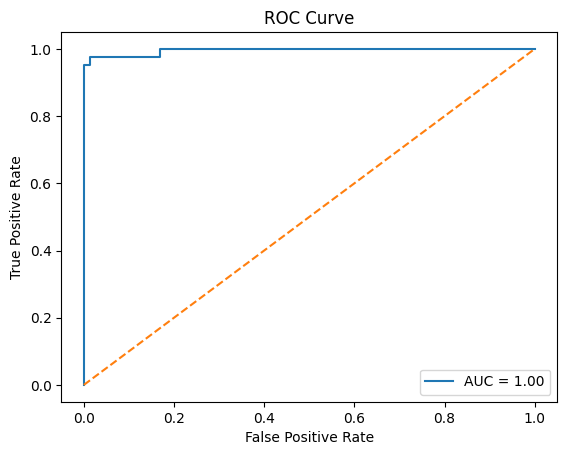

Test loss: 0.069, Test accuracy: 0.982


In [36]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the AUC score
auc = roc_auc_score(y_test, y_pred)

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr, label=f'AUC = {auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Evaluate the model on the test data
loss, accuracy = model.evaluate(X_test, y_test, verbose=0)
print(f'Test loss: {loss:.3f}, Test accuracy: {accuracy:.3f}')

In [8]:

# Split data into training and testing sets
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [9]:
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Dense(32, input_shape=(X_train_scaled.shape[1],), activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=100, batch_size=32, validation_split=0.2)


Epoch 1/100
12/12 [==============================] - 1s 14ms/step - loss: nan - accuracy: 0.6264 - val_loss: nan - val_accuracy: 0.6374
Epoch 2/100
12/12 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6264 - val_loss: nan - val_accuracy: 0.6374
Epoch 3/100
12/12 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6264 - val_loss: nan - val_accuracy: 0.6374
Epoch 4/100
12/12 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6264 - val_loss: nan - val_accuracy: 0.6374
Epoch 5/100
12/12 [==============================] - 0s 5ms/step - loss: nan - accuracy: 0.6264 - val_loss: nan - val_accuracy: 0.6374
Epoch 6/100
12/12 [==============================] - 0s 6ms/step - loss: nan - accuracy: 0.6264 - val_loss: nan - val_accuracy: 0.6374
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: nan - accuracy: 0.6264 - val_loss: nan - val_accuracy: 0.6374
Epoch 8/100
12/12 [==============================] - 0

In [13]:
# Evaluate the model on the testing set
test_loss, test_acc = model.evaluate(X_test_scaled, y_test)
print('Test accuracy:', test_acc)


4/4 [==============================] - 0s 1ms/step - loss: nan - accuracy: 0.6228
Test accuracy: 0.6228070259094238
